# Lab 3

## Task 3.3: Case study

In [1]:
import re
 
emoticons_str = r"""
    (?:
        [<>]?
        [:;=8]                          # eyes
        [\-o\*\'-]?                     # optional nose
        [\)\]\(\[dDpP/\:\>\<\}\{@\|\\]  # mouth
        |
        [\)\]\(\[dDpP/\:\>\<\}\{@\|\\]  # mouth
        [\-o\*\'-]?                     # optional nose
        [:;=8]                          # eyes
        [<>]?
        |
        <3                              # heart
    )"""
 
regex_str = [
    emoticons_str,
    r'<[^>]+>', # HTML tags
    r'(?:@[\w_]+)', # @-mentions
    r"(?:\#+[\w_]+[\w\'_\-]*[\w_]+)", # hash-tags
    r'http[s]?://(?:[a-z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-f][0-9a-f]))+', # URLs
 
    r'(?:(?:\d+,?)+(?:\.?\d+)?)', # numbers
    r"(?:[a-z][a-z'\-_]+[a-z])", # words with - and '
    r'(?:[\w_]+)', # other words
    r'(?:\S)' # anything else
]
    
tokens_re = re.compile(r'('+'|'.join(regex_str)+')', re.VERBOSE | re.IGNORECASE)
emoticon_re = re.compile(r'^'+emoticons_str+'$', re.VERBOSE | re.IGNORECASE)
 
def tokenize(s):
    return tokens_re.findall(s)
 
def preprocess(s, lowercase=False):
    tokens = tokenize(s)
    if lowercase:
        tokens = [token if emoticon_re.search(token) else token.lower() for token in tokens]
    return tokens

In [2]:
import nltk
from nltk.corpus import stopwords
nltk.download("stopwords") # download the stopword corpus on our computer
import string
 
language = 'english'
punctuation = list(string.punctuation)
stop = stopwords.words(language) + punctuation + ['rt', 'via', 'RT']




[nltk_data] Downloading package stopwords to /home/ckb/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
import operator 
import json
from collections import Counter
 
fname = 'CaseStudy.json'
with open(fname, 'r') as f:
    count_all = Counter()
    for line in f:
        tweet = json.loads(line)
        # Create a list with all the terms
        terms_hash = [term for term in preprocess(tweet['text'].encode('utf-8')) if term.startswith('#') and term not in stop]        
        count_all.update(terms_hash)
# Print the first 15 most frequent words
print(count_all.most_common(15))

[('#Barcelona', 68), ('#Messi', 30), ('#FCBLive', 17), ('#UDLasPalmas', 13), ('#VamosUD', 13), ('#barcelona', 10), ('#CopaDelRey', 8), ('#empleo', 6), ('#BCN', 6), ('#riesgoimpago', 6), ('#news', 5), ('#LaLiga', 5), ('#SportsCenter', 4), ('#LionelMessi', 4), ('#Informe', 4)]


#### Plot of dataset CaseStudy.json

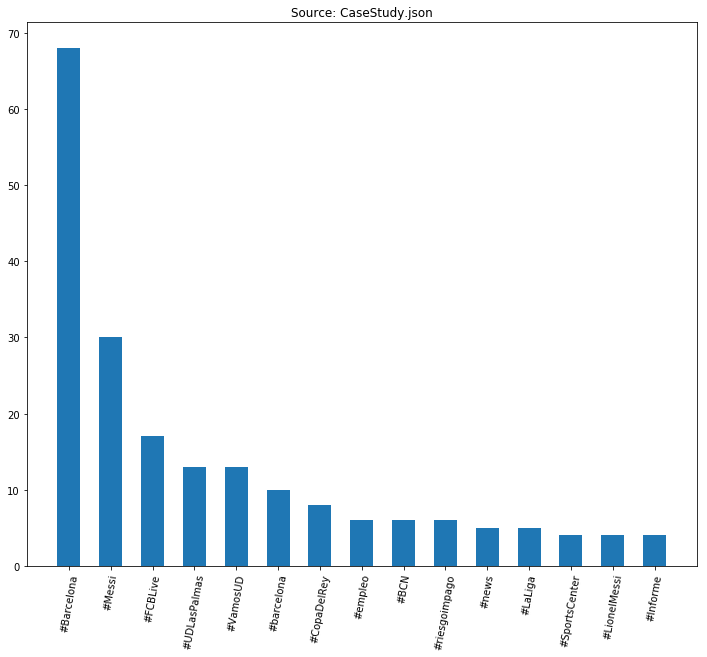

In [7]:
%matplotlib inline
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (12,10)
import matplotlib.pyplot as plt

sorted_x, sorted_y = zip(*count_all.most_common(15))
#print(sorted_x, sorted_y)

plt.bar(range(len(sorted_x)), sorted_y, width=0.55, align='center');
plt.xticks(range(len(sorted_x)), sorted_x, rotation=80);
plt.axis('tight');
plt.title('Source: CaseStudy.json');

#### Plot of dataset ArtificialIntelligenceTweets.json

[nltk_data] Downloading package stopwords to /home/ckb/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


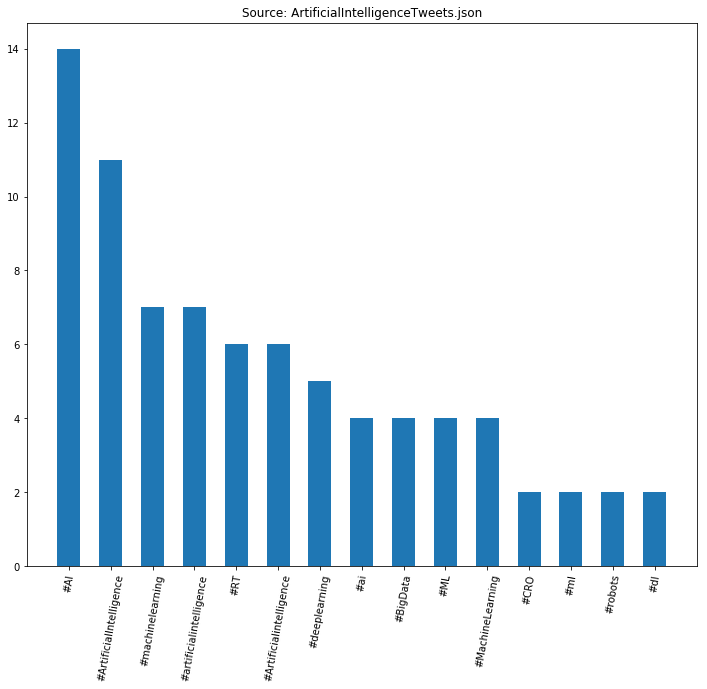

In [10]:
%matplotlib inline  # inline permits plotting figures inline, instead of in a new window or shell 
import matplotlib as mpl
import matplotlib.pyplot as plt

import operator 
import json
from collections import Counter
 
import nltk
from nltk.corpus import stopwords
nltk.download("stopwords")     # download the stopword corpus
import string

import re
 
emoticons_str = r"""
    (?:
        [<>]?
        [:;=8]                          # eyes
        [\-o\*\'-]?                     # optional nose
        [\)\]\(\[dDpP/\:\>\<\}\{@\|\\]  # mouth
        |
        [\)\]\(\[dDpP/\:\>\<\}\{@\|\\]  # mouth
        [\-o\*\'-]?                     # optional nose
        [:;=8]                          # eyes
        [<>]?
        |
        <3                              # heart
    )"""
 
regex_str = [
    emoticons_str,
    r'<[^>]+>', # HTML tags
    r'(?:@[\w_]+)', # @-mentions
    r"(?:\#+[\w_]+[\w\'_\-]*[\w_]+)", # hash-tags
    r'http[s]?://(?:[a-z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-f][0-9a-f]))+', # URLs
 
    r'(?:(?:\d+,?)+(?:\.?\d+)?)', # numbers
    r"(?:[a-z][a-z'\-_]+[a-z])", # words with - and '
    r'(?:[\w_]+)', # other words
    r'(?:\S)' # anything else
]
    
tokens_re = re.compile(r'('+'|'.join(regex_str)+')', re.VERBOSE | re.IGNORECASE)
emoticon_re = re.compile(r'^'+emoticons_str+'$', re.VERBOSE | re.IGNORECASE)
 
def tokenize(s):
    return tokens_re.findall(s)
 
def preprocess(s, lowercase=False):
    tokens = tokenize(s)
    if lowercase:
        tokens = [token if emoticon_re.search(token) else token.lower() for token in tokens]
    return tokens

language = 'english'
punctuation = list(string.punctuation)
stop = stopwords.words(language) + punctuation + ['rt', 'via', 'RT']

fname = 'ArtificialIntelligenceTweets.json'
with open(fname, 'r') as f:
    count_all = Counter()
    for line in f:
        tweet = json.loads(line.encode('utf-8'))
        # Create a list with all the terms
        terms_hash = [term for term in preprocess(tweet['text'].encode('utf-8')) if term.startswith('#') and term not in stop]        
        count_all.update(terms_hash)
        
mpl.rcParams['figure.figsize'] = (12,10)

sorted_x, sorted_y = zip(*count_all.most_common(15))
#print(sorted_x, sorted_y)

plt.bar(range(len(sorted_x)), sorted_y, width=0.55, align='center');
plt.xticks(range(len(sorted_x)), sorted_x, rotation=80);
plt.axis('tight');
plt.title('Source: ArtificialIntelligenceTweets.json');